In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jawadbenali","key":"bfa9f810facbf1bd72e164820828d7f9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:08<00:00, 118MB/s] 
100% 812M/812M [00:08<00:00, 105MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

In [ ]:
import pandas as pd
import os, shutil, pathlib
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from IPython.display import Image

In [ ]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
        shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_size = 3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 64,kernel_size = 3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 128,kernel_size = 3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 256,kernel_size = 3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 256,kernel_size = 3,activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
train_ds = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = (180,180),
    batch_size = 32,
    )
validation_ds = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = (180,180),
    batch_size = 32,
    )
test_ds = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = (180,180),
    batch_size = 32,
    )

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_ds:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch.keras",
save_best_only=True,
monitor="val_loss")
]


In [ ]:
history = model.fit(
                    train_ds,
                    epochs=30,
                    callbacks=callbacks,
                    validation_data=validation_ds
                    )

Epoch 1/30
63/63 [==============================] - 4s 57ms/step - loss: 0.4324 - accuracy: 0.8045 - val_loss: 0.5740 - val_accuracy: 0.7030
Epoch 2/30
63/63 [==============================] - 4s 59ms/step - loss: 0.3739 - accuracy: 0.8400 - val_loss: 0.5858 - val_accuracy: 0.7190
Epoch 3/30
63/63 [==============================] - 6s 100ms/step - loss: 0.3214 - accuracy: 0.8565 - val_loss: 0.6168 - val_accuracy: 0.7360
Epoch 4/30
63/63 [==============================] - 4s 56ms/step - loss: 0.2739 - accuracy: 0.8800 - val_loss: 0.7566 - val_accuracy: 0.6980
Epoch 5/30
63/63 [==============================] - 4s 66ms/step - loss: 0.2183 - accuracy: 0.9170 - val_loss: 0.6814 - val_accuracy: 0.7170
Epoch 6/30
63/63 [==============================] - 6s 84ms/step - loss: 0.1911 - accuracy: 0.9315 - val_loss: 0.8045 - val_accuracy: 0.7220
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.1445 - accuracy: 0.9450 - val_loss: 1.1348 - val_accuracy: 0.7210
Epoch 8/30
6

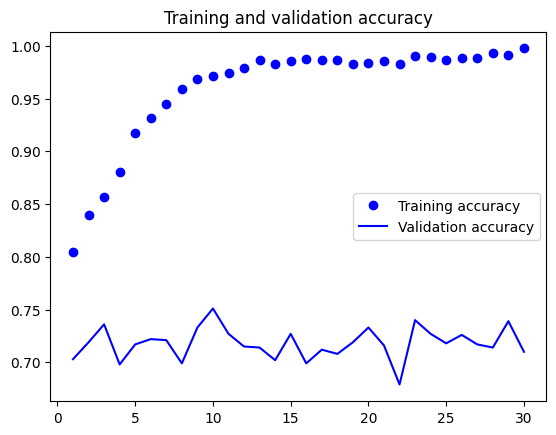

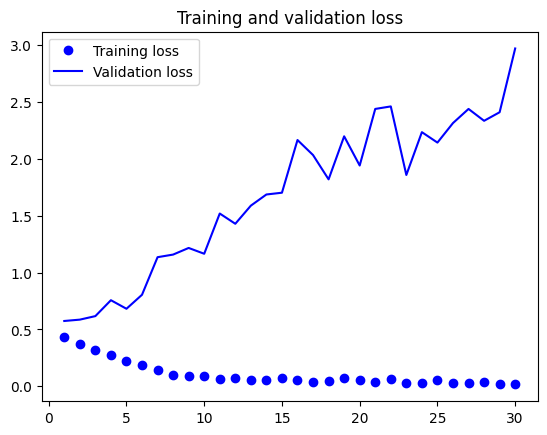

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
import cv2
image_path = 'cats_vs_dogs_small/train/cat/cat.2.jpg'
image = cv2.imread(image_path)
print(image.shape)

(396, 312, 3)
